# Waiter Tips Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

import warnings; warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.shape

(244, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
df.describe()


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
max_bill = np.round(np.max(df["total_bill"]),2)
print("The maximium total bill of customer is :",max_bill)
min_bill = np.round(np.mean(df["total_bill"]),2)
print("The minimum total bill of customer is :",min_bill)
average_bill = np.round(np.average(df["total_bill"]),2)
print("The average total bill of customer is :",average_bill)

The maximium total bill of customer is : 50.81
The minimum total bill of customer is : 19.79
The average total bill of customer is : 19.79


<Axes: xlabel='total_bill', ylabel='Count'>

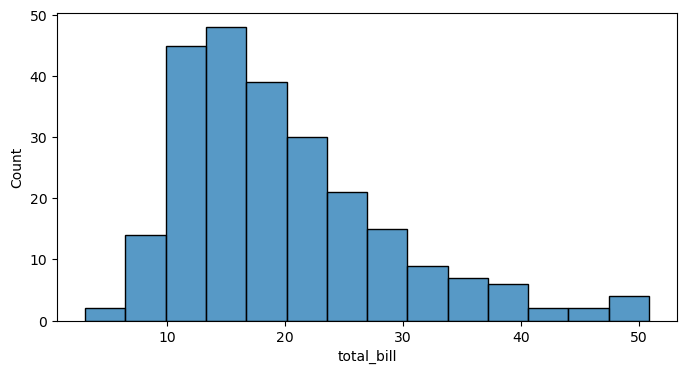

In [7]:
plt.figure(figsize = (8,4))
sns.histplot(data = df, x = "total_bill")

In [8]:
max_tip = np.round(np.max(df["tip"]),2)
print("The maximium tip by customer is :",max_tip)
min_tip = np.round(np.mean(df["tip"]),2)
print("The minimum tip by customer is :",min_tip)
average_tip = np.round(np.average(df["tip"]),2)
print("The average tip by customer is :",average_tip)

The maximium tip by customer is : 10.0
The minimum tip by customer is : 3.0
The average tip by customer is : 3.0


<Axes: xlabel='tip', ylabel='Count'>

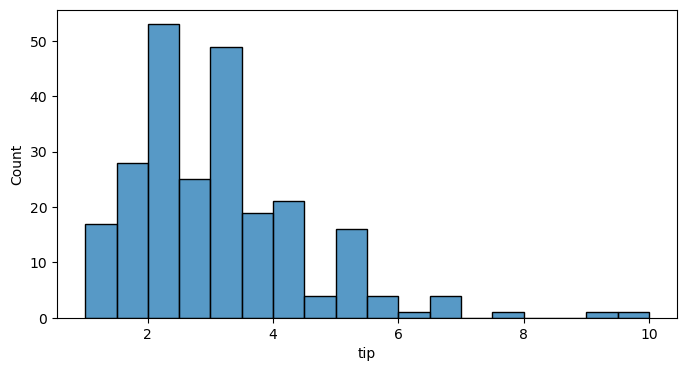

In [9]:
plt.figure(figsize = (8,4))
sns.histplot(data = df, x = "tip")

In [10]:
max_size = np.round(np.max(df["size"]))
print("The maximium size of customer is :",max_size)
min_size = np.round(np.mean(df["size"]))
print("The minimum size of customer is :",min_size)
average_size = np.round(np.average(df["size"]))
print("The average size of customer is :",average_size)

The maximium size of customer is : 6
The minimum size of customer is : 3.0
The average size of customer is : 3.0


<Axes: xlabel='size', ylabel='Count'>

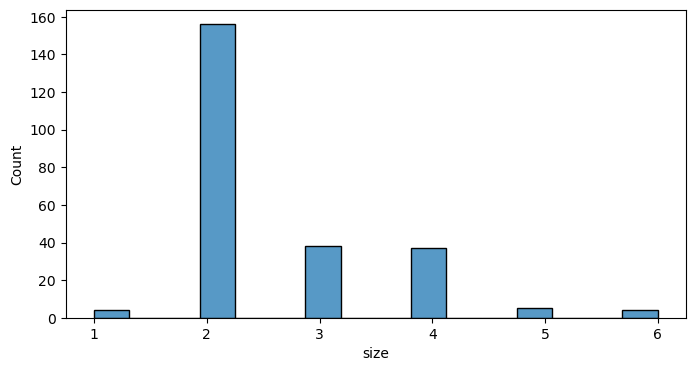

In [11]:
plt.figure(figsize = (8,4))
sns.histplot(data = df, x = "size")

<Axes: >

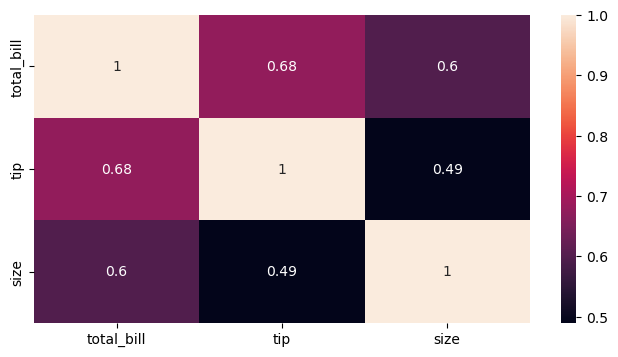

In [12]:
plt.figure(figsize = (8,4))
sns.heatmap(df.corr(),annot = True)

<Axes: xlabel='sex', ylabel='total_bill'>

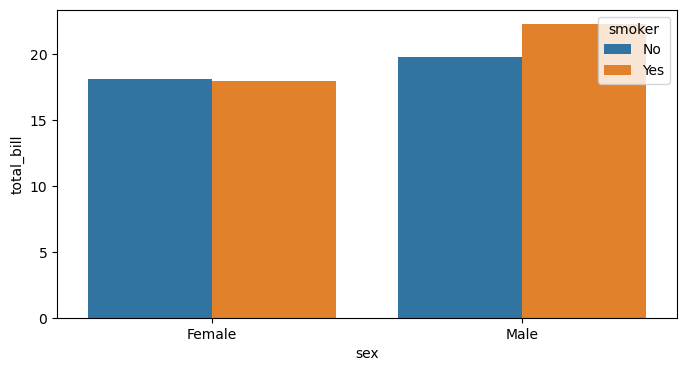

In [13]:
plt.figure(figsize = (8,4))
sns.barplot(data = df, x = "sex", y = "total_bill",hue = "smoker", ci = None )

Males who are smokers are likely to order expensive food and leading to  higher bills

<Axes: xlabel='sex', ylabel='tip'>

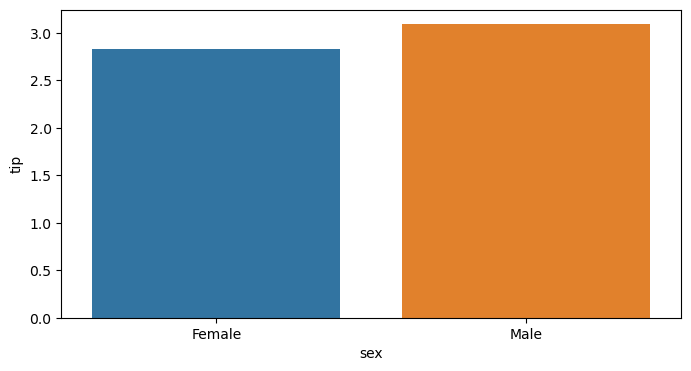

In [14]:
plt.figure(figsize = (8,4))
sns.barplot(data = df, x = "sex", y = "tip",ci = None )

Males are likely to give higher tips

<Axes: xlabel='sex', ylabel='tip'>

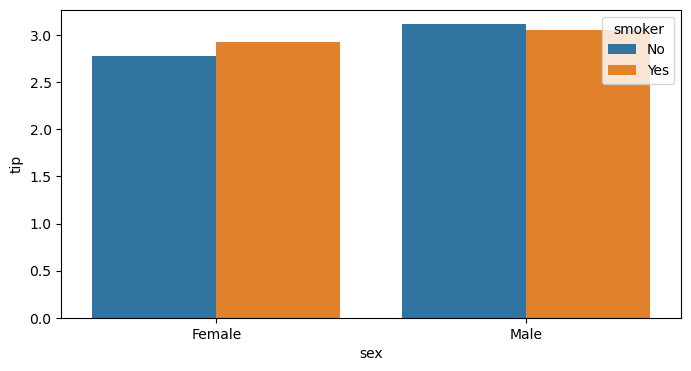

In [15]:
plt.figure(figsize = (8,4))
sns.barplot(data = df, x = "sex", y = "tip",hue = "smoker" ,ci = None )

There is no much to interpret who will give higher tips based on if person is smoker or not

<Axes: xlabel='sex', ylabel='total_bill'>

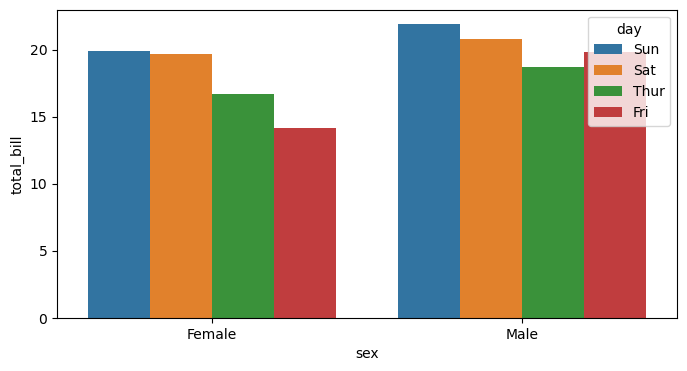

In [16]:
plt.figure(figsize = (8,4))
sns.barplot(data = df, x = "sex", y = "total_bill",hue = "day" ,ci = None )

on weekends customers will order expensive items leading to higher bills

<Axes: xlabel='sex', ylabel='tip'>

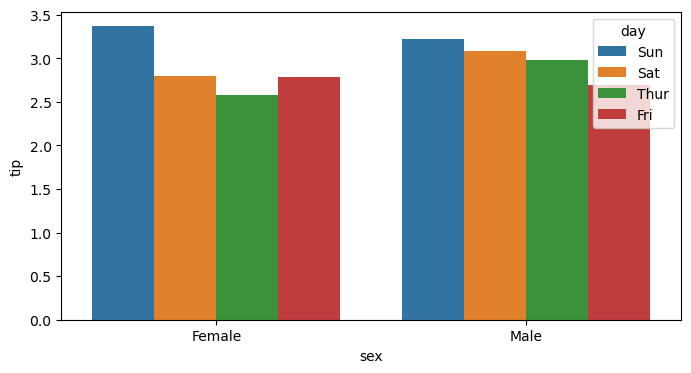

In [17]:
plt.figure(figsize = (8,4))
sns.barplot(data = df, x = "sex", y = "tip",hue = "day" ,ci = None )

Females are likely to give higher tips on sunday

<Axes: xlabel='sex', ylabel='total_bill'>

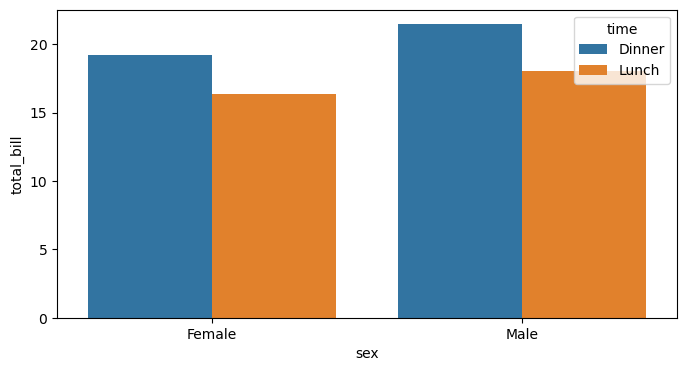

In [18]:
plt.figure(figsize = (8,4))
sns.barplot(data = df, x = "sex", y = "total_bill",hue = "time" ,ci = None )

People like to spend more on Dinner 

<Axes: xlabel='sex', ylabel='tip'>

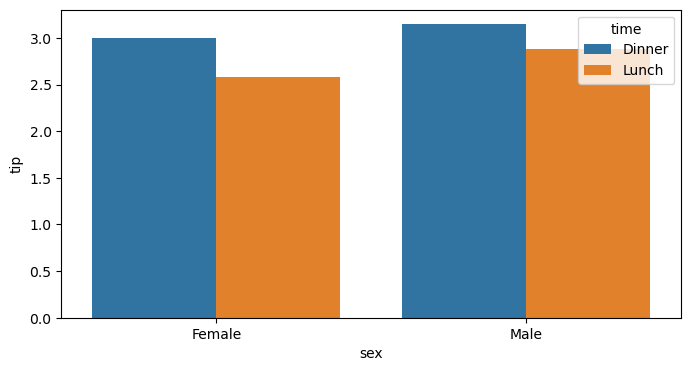

In [19]:
plt.figure(figsize = (8,4))
sns.barplot(data = df, x = "sex", y = "tip",hue = "time" ,ci = None )

Dinner time waiter are likely to get higher tips

### One hOt encoding

In [20]:
df["sex"] = df["sex"].map({"Female":0,"Male" :1})
df["smoker"] = df["smoker"].map({"No":0,"Yes":1})
df["day"] = df["day"].map({"Fri":0,"Thur":1,"Sat":2,"Sun":3})
df["time"] = df["time"].map({"Lunch":0,"Dinner":1})

In [21]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


### Train test split

In [22]:
x = df.drop("tip",axis = 1)
y = df["tip"]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

### Building Model

In [24]:
st_model_1 = sm.OLS(y_train,x_train)
st_model_1 = st_model_1.fit()
print(st_model_1.summary())

                                 OLS Regression Results                                
Dep. Variable:                    tip   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              271.3
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                    4.84e-90
Time:                        22:05:44   Log-Likelihood:                         -287.95
No. Observations:                 195   AIC:                                      587.9
Df Residuals:                     189   BIC:                                      607.5
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Linear Regression

In [25]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred = model.predict(x_test)

In [27]:
r2 = r2_score(y_test,y_pred)
print("R-squared :",r2)
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error :",mse)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error :",rmse)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Absoulte Error :", mae)

R-squared : 0.5793912000328765
Mean Squared Error : 0.8439798838491332
Root Mean Squared Error : 0.9186837779394678
Mean Absoulte Error : 0.6652262807327864


### Prediction

In [29]:
#["total_bill","sex","smoker","day","time","size"]
features = np.array([[15.87,1,0,3,1,6]])
model.predict(features)

array([3.29713917])